# Reddit Data Analysis Project
### Analyzing Engagement and Trends in Reddit Posts

In this project, we explore a dataset of Reddit posts to uncover insights into user engagement, popular content, and trends across subreddits. The analysis includes data cleaning, exploratory data analysis (EDA), visualization, and feature engineering to produce actionable insights.


### Importing Libraries

We import essential libraries for:
- **Data Manipulation** (pandas, numpy)
- **Visualization** (matplotlib, seaborn)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Loading the Dataset

The data is loaded into a pandas DataFrame, displaying the first few rows to inspect column names, data types, and sample values.


In [2]:
# load dataset
df = pd.read_csv('output_file.csv')

C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\4270600418.py:2: DtypeWarning: Columns (2,3,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('output_file.csv')


In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042806 entries, 0 to 1042805
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   author                   1042806 non-null  object 
 1   author_created_utc       542809 non-null   float64
 2   author_fullname          573462 non-null   object 
 3   author_premium           403140 non-null   object 
 4   banned_by                0 non-null        float64
 5   id                       1042806 non-null  object 
 6   num_comments             1042806 non-null  int64  
 7   domain                   1042554 non-null  object 
 8   num_crossposts           1042806 non-null  int64  
 9   edited                   1042806 non-null  object 
 10  over_18                  1042806 non-null  bool   
 11  retrieved_on             861195 non-null   float64
 12  retrieved_utc            254940 non-null   float64
 13  score                    1042806 non-null 

,author_created_utc,banned_by,num_comments,num_crossposts,retrieved_on,retrieved_utc,score,subreddit_subscribers,total_awards_received,upvote_ratio
count,5.428090e+05,0.0,1.042806e+06,1.042806e+06,8.611950e+05,2.549400e+05,1.042806e+06,1.042806e+06,1.042806e+06,1.042806e+06
mean,1.545588e+09,NaN,1.353080e+01,7.290905e-03,1.534496e+09,1.635490e+09,1.424596e+01,2.610241e+05,2.461436e-02,2.602699e-01
std,6.421695e+07,NaN,3.151639e+01,1.162460e-01,7.633812e+07,1.560889e+07,1.106569e+02,3.026430e+05,4.912379e-01,4.124237e-01
min,1.120363e+09,NaN,-5.300000e+01,0.000000e+00,1.411405e+09,1.622812e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.516755e+09,NaN,4.000000e+00,0.000000e+00,1.472794e+09,1.623025e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.551335e+09,NaN,7.000000e+00,0.000000e+00,1.529794e+09,1.623453e+09,2.000000e+00,9.653500e+04,0.000000e+00,0.000000e+00
75%,1.591329e+09,NaN,1.400000e+01,0.000000e+00,1.586833e+09,1.654165e+09,6.000000e+00,5.541930e+05,0.000000e+00,6.700000e-01
max,1.672470e+09,NaN,8.227000e+03,2.200000e+01,1.673229e+09,1.657169e+09,1.121100e+04,9.334490e+05,1.330000e+02,1.000000e+00


### Data Cleaning

We check and handle missing values:
- Fill empty `selftext` fields with an empty string.
- Drop rows with missing critical values in `score` and `num_comments`.


In [4]:
df.isnull().sum()

author                           0
author_created_utc          499997
author_fullname             469344
author_premium              639666
banned_by                  1042806
id                               0
num_comments                     0
domain                         252
num_crossposts                   0
edited                           0
over_18                          0
retrieved_on                181611
retrieved_utc               787866
score                            0
selftext                         5
subreddit                        0
subreddit_id                     0
subreddit_name_prefixed     610397
subreddit_subscribers            0
title                            3
total_awards_received            0
upvote_ratio                     0
dtype: int64

In [5]:
# Remove unwanted Columns
columns_to_drop = ['author_premium','banned_by','domain','num_crossposts','subreddit_name_prefixed']
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
df.isnull().sum()

author                        0
author_created_utc       499997
author_fullname          469344
id                            0
num_comments                  0
edited                        0
over_18                       0
retrieved_on             181611
retrieved_utc            787866
score                         0
selftext                      5
subreddit                     0
subreddit_id                  0
subreddit_subscribers         0
title                         3
total_awards_received         0
upvote_ratio                  0
dtype: int64

In [7]:
# Removing all the rows which are NAN
df.dropna(subset=['author_fullname', 'author_created_utc', 'retrieved_on', 'retrieved_utc', 'title'],inplace=True)

In [8]:
df.isnull().sum()

author                   0
author_created_utc       0
author_fullname          0
id                       0
num_comments             0
edited                   0
over_18                  0
retrieved_on             0
retrieved_utc            0
score                    0
selftext                 0
subreddit                0
subreddit_id             0
subreddit_subscribers    0
title                    0
total_awards_received    0
upvote_ratio             0
dtype: int64

In [9]:
# Convert to date and time 
df['author_created_utc'] = pd.to_datetime(df['author_created_utc'],unit='s')
df['retrieved_on'] = pd.to_datetime(df['retrieved_on'],unit='s')
df['retrieved_utc'] = pd.to_datetime(df['retrieved_utc'],unit='s')

In [10]:
# Making the datatype as INT
df['num_comments'] = df['num_comments'].astype(int)
df['over_18'] = df['over_18'].astype(int)
df['score'] = df['score'].astype(int)
df['subreddit_subscribers'] = df['subreddit_subscribers'].astype(int)
df['total_awards_received'] = df['total_awards_received'].astype(int)

In [11]:
df['over_18'] = df['over_18'].astype(bool)

### Top Subreddits by Subscriber Count

This bar chart visualizes the top subreddits by their subscriber count. We grouped the data by subreddit and calculated the maximum subscriber count for each subreddit to highlight the communities with the highest followings.

#### Key Points:
- **X-Axis**: Represents different subreddits in our dataset.
- **Y-Axis**: Shows the subscriber count for each subreddit.
- **Color Palette**: Custom colors are used to differentiate the bars and enhance visual appeal.

From this visualization, we can identify the subreddits with the largest communities. High subscriber counts generally indicate popular or active communities with substantial engagement. For example, we can see that subreddits like "Drugs," "weed," and "LSD" have significantly higher subscriber counts compared to others, suggesting they attract a large audience.

This type of analysis helps us understand where Reddit users are most engaged and where specific topics generate the most interest.


C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\3566825814.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subreddit_df, x='subreddit', y='subscribers', palette=custom_colors)
C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\3566825814.py:10: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=subreddit_df, x='subreddit', y='subscribers', palette=custom_colors)


<Figure size 1500x800 with 0 Axes>

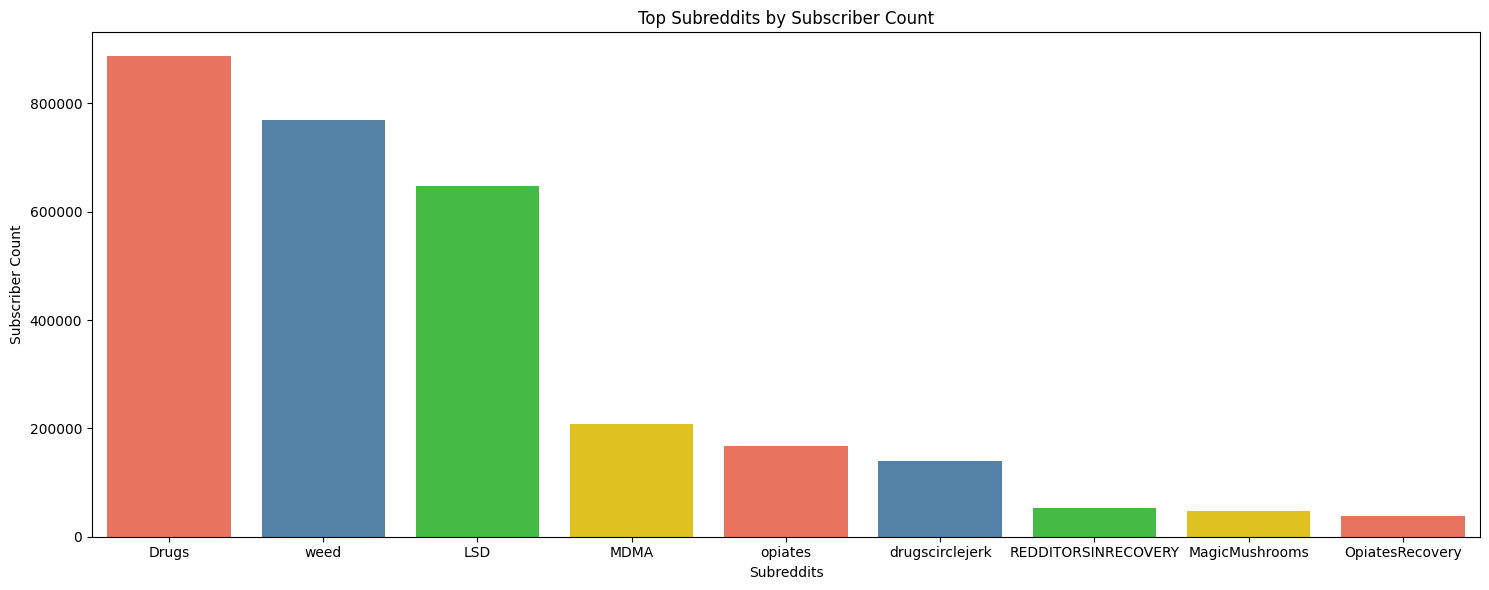

In [93]:
subreddit_df = df.groupby('subreddit')['subreddit_subscribers'].max(
).reset_index().sort_values(by='subreddit_subscribers', ascending=False)
subreddit_df.columns = ['subreddit', 'subscribers']
plt.figure(figsize=(15, 8))

custom_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']


plt.figure(figsize=(15, 6))
sns.barplot(data=subreddit_df, x='subreddit', y='subscribers', palette=custom_colors)

plt.xlabel('Subreddits')

plt.ylabel('Subscriber Count')

plt.title('Top Subreddits by Subscriber Count')


plt.tight_layout()

plt.show()

### Distribution of Comments (Capped)

This histogram displays the distribution of comments per post, with the values capped at 100 to improve readability. The original dataset likely included a long tail with some posts having an extremely high number of comments, which could make it challenging to interpret the distribution for typical posts. By capping the comments at 100, we focus on the majority of posts that receive a smaller number of comments.

#### Key Points:
- **X-Axis**: Represents the number of comments on posts, capped at a maximum of 100.
- **Y-Axis**: Shows the frequency, or the number of posts that fall into each comment range.
- **KDE Curve**: The line overlay shows the Kernel Density Estimate (KDE), which smooths the distribution curve for better visibility of trends.

#### Insights:
- The distribution is heavily skewed toward posts with a low number of comments, with most posts receiving fewer than 20 comments.
- The high concentration around the lower comment range suggests that the majority of posts do not generate extensive discussions.
- The cap at 100 helps us focus on typical engagement levels, while still capturing some posts with moderately high comment counts.

This analysis provides insight into general engagement levels, showing that only a few posts manage to gather significant interactions in the form of comments.

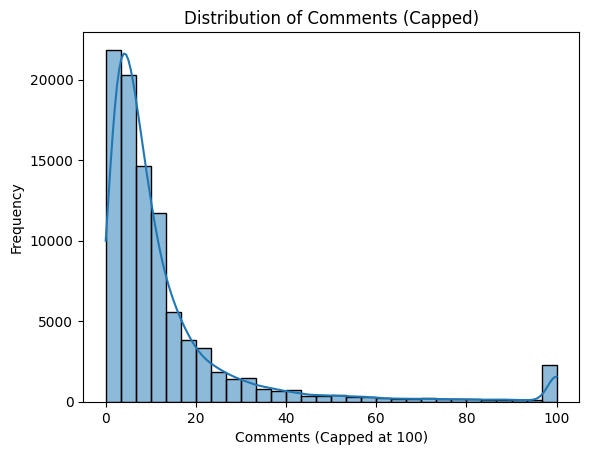

In [ ]:
#Distribution of Comments
capped_comments = df['num_comments'].clip(upper=100)

sns.histplot(capped_comments, bins=30, kde=True)
plt.xlabel('Comments (Capped at 100)')
plt.ylabel('Frequency')
plt.title('Distribution of Comments (Capped)')
plt.show()

### Distribution of Log-Transformed Scores

This histogram displays the distribution of scores after applying a logarithmic transformation. The log transformation is applied to reduce skewness and compress a wide range of values into a more interpretable format, especially when there are extreme outliers.

#### Key Points:
- **X-Axis**: Represents the log-transformed scores. The transformation helps by scaling down high values, making the distribution easier to analyze.
- **Y-Axis**: Shows the frequency, or the number of posts that fall into each log-transformed score range.
- **KDE Curve**: The KDE overlay smooths the distribution, providing a clearer view of the underlying pattern.

#### Insights:
- The majority of posts have relatively low scores (between 0 and 3 on the log scale), indicating that most posts receive modest engagement.
- The distribution has a long tail to the right, even after transformation, indicating that a small subset of posts receives significantly higher engagement.
- The log transformation effectively compresses the scale, enabling a better view of typical scores and reducing the impact of high outliers.

This transformation allows for easier interpretation of score distribution, giving insight into general engagement levels without being dominated by a few high-scoring posts.

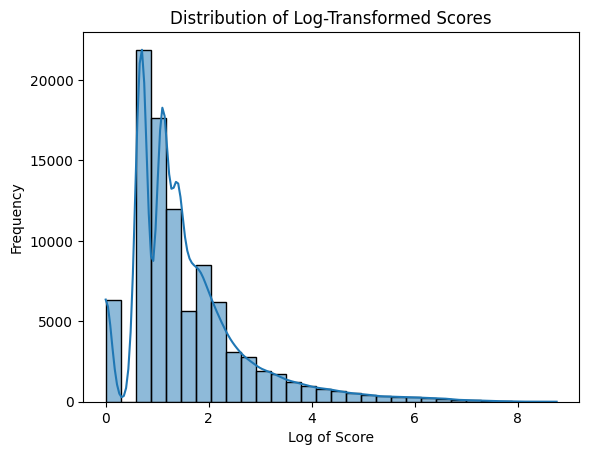

In [ ]:
import numpy as np

log_scores = np.log1p(df['score'])

sns.histplot(log_scores, bins=30, kde=True)
plt.xlabel('Log of Score')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Scores')
plt.show()

### Relation between Post Score and Number of Comments

This scatter plot visualizes the relationship between the score of a post and the number of comments it receives. Each point represents a post, with its position determined by the `score` (x-axis) and `number of comments` (y-axis).

#### Key Points:
- **X-Axis**: Displays the post score, which indicates the level of positive engagement or upvotes a post has received.
- **Y-Axis**: Shows the number of comments on each post, representing the level of interaction or discussion it generated.

#### Insights:
- **Concentration in Low Scores and Comments**: The majority of posts are clustered in the lower left corner, with both low scores and low comment counts. This suggests that most posts receive limited engagement and discussion.
- **Outliers with High Engagement**: A few points extend out to the right and upwards, showing posts that received very high scores and/or comment counts. These are likely highly popular or viral posts that sparked more interaction.
- **No Strong Linear Correlation**: Although higher scores tend to be associated with more comments, there’s no strict linear relationship. Some high-score posts have relatively low comments, and vice versa.

This plot helps us understand that while high-scoring posts may attract more comments on average, score alone is not a perfect predictor of the level of discussion.

C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\2451814194.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


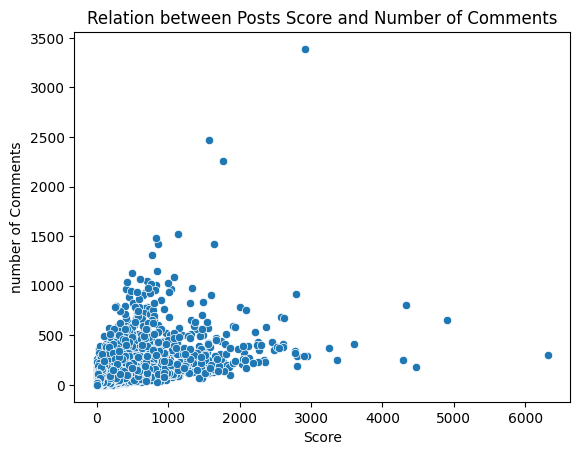

In [ ]:
sns.scatterplot(
    data=df, x='score', y='num_comments',                
    sizes=(20, 200),             
    palette='viridis',           
    edgecolor='w',              
    linewidth=0.5,               
    marker='o',                  
    legend='full'  
)
plt.xlabel('Score')
plt.ylabel('number of Comments')
plt.title("Relation between Posts Score and Number of Comments")
plt.show()

### Top 10 Subreddits by Average Score

This bar plot highlights the top 10 subreddits based on their average post score. We calculate the average score for each subreddit and display the subreddits with the highest values to identify communities with the most highly-rated posts.

#### Key Points:
- **X-Axis**: Represents the average score of posts in each subreddit, indicating the overall level of positive engagement.
- **Y-Axis**: Lists the subreddits, with the highest average scores at the top.

#### Insights:
- **High Average Scores in Specific Communities**: The subreddits "drugscirclejerk," "Drugs," and "LSD" have the highest average scores, suggesting that posts in these communities tend to receive more upvotes and positive engagement.
- **Interest and Engagement**: Subreddits focused on specific topics, such as drug-related discussions and recovery communities, show notable engagement based on their average scores.
- **Relative Engagement**: The variations in average scores across subreddits help us understand which communities are more engaged or appreciative of content.

This plot provides insights into the subreddits with the most engaged audiences, showing where posts are rated highly on average.

C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\3134458008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_score_subreddit.values , y=average_score_subreddit.index, palette='viridis')


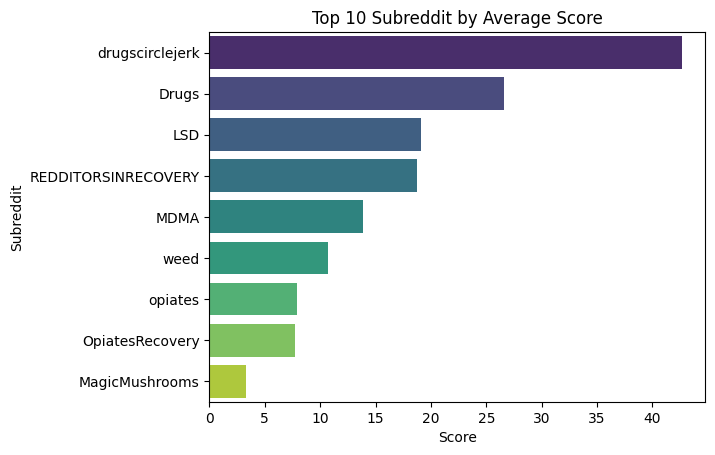

In [51]:
#Bar plot of average score by subreddit
average_score_subreddit = df.groupby('subreddit')['score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=average_score_subreddit.values , y=average_score_subreddit.index, palette='viridis')
plt.xlabel('Score')
plt.ylabel('Subreddit')
plt.title('Top 10 Subreddit by Average Score')
plt.show()

### Relationship between Post Score and Number of Comments

This scatter plot visualizes the relationship between the score of a post and the number of comments it receives. Each point represents a post, with its position determined by its `score` on the x-axis and `number of comments` on the y-axis.

#### Key Points:
- **X-Axis**: Displays the post score, representing the level of upvotes a post has received.
- **Y-Axis**: Shows the number of comments on each post, indicating how much discussion the post generated.

#### Insights:
- **Cluster of Low Scores and Comments**: Most posts are concentrated in the lower left corner, with both low scores and low comment counts. This indicates that many posts receive minimal engagement.
- **Higher Engagement Outliers**: A few points are spread out toward higher scores and comment counts, indicating popular posts that generated substantial discussion.
- **Non-linear Relationship**: While higher scores tend to correspond with more comments, there isn’t a strict linear relationship. Some posts with high scores have relatively few comments, and some with moderate scores have a significant number of comments.

This plot provides insight into the dynamics between upvotes and comments, showing that while they are generally related, high scores do not always mean more discussion.


C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\3320754167.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


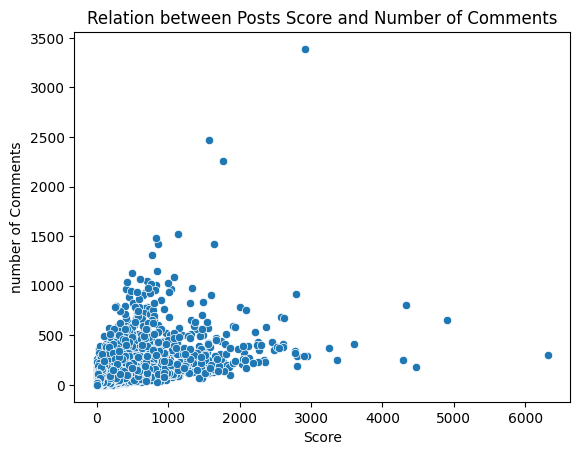

In [94]:
sns.scatterplot(
    data=df, x='score', y='num_comments',                
    sizes=(20, 200),             
    palette='viridis',           
    edgecolor='w',              
    linewidth=0.5,               
    marker='o',                  
    legend='full'  
)
plt.xlabel('Score')
plt.ylabel('number of Comments')
plt.title("Relation between Posts Score and Number of Comments")
plt.show()

### Upvote Ratio by NSFW Status

This box plot displays the distribution of upvote ratios for posts, grouped by their NSFW (Not Safe For Work) status. The NSFW status is indicated by `True` for 18+ content and `False` for general content.

#### Key Points:
- **X-Axis**: Represents the NSFW status, with `True` indicating posts marked as NSFW (18+) and `False` indicating non-NSFW posts.
- **Y-Axis**: Shows the upvote ratio, which is the proportion of upvotes to total votes, giving an idea of the positive reception of posts.

#### Insights:
- **High Median Upvote Ratios**: Both NSFW and non-NSFW posts have high median upvote ratios, close to 1.0, indicating that most posts receive a positive reception from users regardless of content type.
- **Outliers with Lower Upvote Ratios**: Both categories have some outliers with low upvote ratios, showing posts that received relatively negative reception.
- **Slight Variation**: Although the median upvote ratio for NSFW content is slightly higher than for non-NSFW content, the overall distribution is similar, suggesting that NSFW status does not significantly affect the upvote ratio.

This analysis helps us understand whether NSFW content affects how positively or negatively posts are received in terms of upvote ratios.


C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\1062353487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='over_18', y='upvote_ratio', palette='pastel')


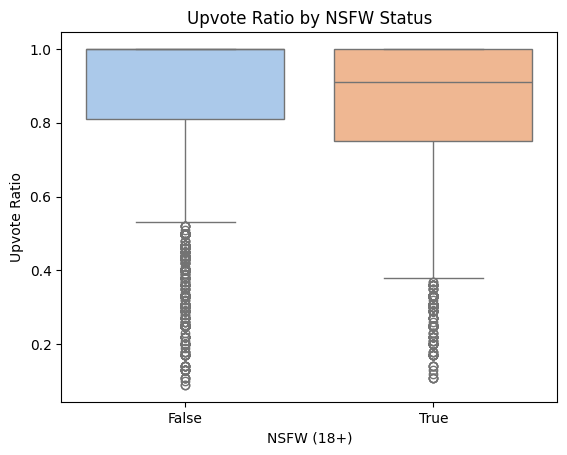

In [53]:
sns.boxplot(data=df, x='over_18', y='upvote_ratio', palette='pastel')
plt.xlabel('NSFW (18+)')
plt.ylabel('Upvote Ratio')
plt.title('Upvote Ratio by NSFW Status')
plt.show()

### Total Awards Received by Subreddit

This bar chart illustrates the total number of awards received by posts in each subreddit. Awards on Reddit are a way for users to recognize high-quality content, so the total awards a subreddit receives can indicate the level of appreciation for its content.

#### Key Points:
- **X-Axis**: Represents the total number of awards received by each subreddit.
- **Y-Axis**: Lists the subreddits, ordered by the total awards they received, with the most awarded subreddit at the top.

#### Insights:
- **Most-Awarded Subreddits**: "Drugs" stands out as the subreddit with the highest total awards, followed by "LSD" and "weed." This suggests that these communities produce highly valued content.
- **Varied Engagement Levels**: The distribution of awards varies significantly across subreddits, indicating that certain communities attract more positive recognition than others.
- **Popularity of Topics**: Subreddits focused on specific substances or recovery discussions seem to attract more awards, reflecting the active and appreciative nature of these communities.

This analysis provides insight into which subreddits have the most appreciated content, based on the total awards received.


C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\2915305589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=awards_received.values, y=awards_received.index, palette='magma')


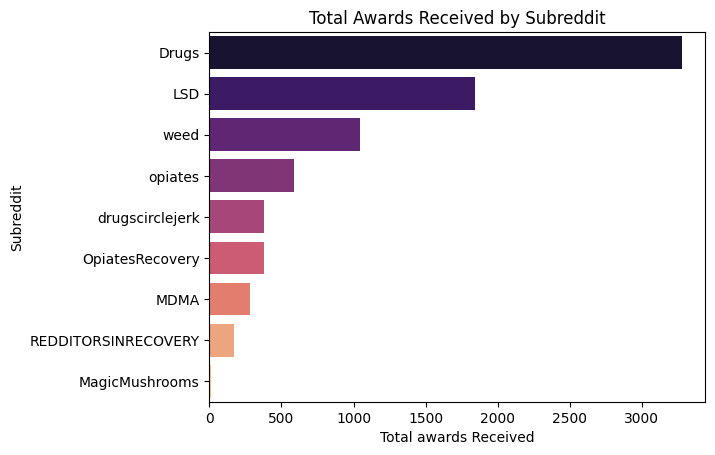

In [66]:
# Total Awards received by subreddit
awards_received = df.groupby('subreddit')['total_awards_received'].sum().sort_values(ascending=False)
sns.barplot(x=awards_received.values, y=awards_received.index, palette='magma')
plt.xlabel('Total awards Received')
plt.ylabel('Subreddit')
plt.title("Total Awards Received by Subreddit")
plt.show()

### Correlation Heatmap of Numerical Features

This heatmap visualizes the correlation between key numerical features in the dataset. Correlation values range from -1 to 1:
- **1** indicates a perfect positive correlation (as one variable increases, the other also increases).
- **-1** indicates a perfect negative correlation (as one variable increases, the other decreases).
- **0** indicates no correlation.

#### Key Points:
- **Score and Number of Comments**: There is a moderate positive correlation (0.63) between `score` and `num_comments`, suggesting that posts with higher scores generally receive more comments, reflecting higher engagement.
- **Upvote Ratio**: `upvote_ratio` shows low correlations with other features, indicating that it might be influenced by factors not captured in the dataset.
- **Subreddit Subscribers**: The number of `subreddit_subscribers` has weak correlations with other metrics, meaning that a larger subreddit size does not necessarily correlate with higher scores or comments on individual posts.

#### Insights:
This heatmap helps identify relationships between metrics, indicating that while `score` and `num_comments` are somewhat related, other variables, like `upvote_ratio` and `subreddit_subscribers`, show weaker connections to engagement metrics. This suggests that various factors might influence engagement on Reddit beyond the features included here.

The correlation analysis offers insight into which features are interdependent, aiding in understanding the dynamics of user engagement.


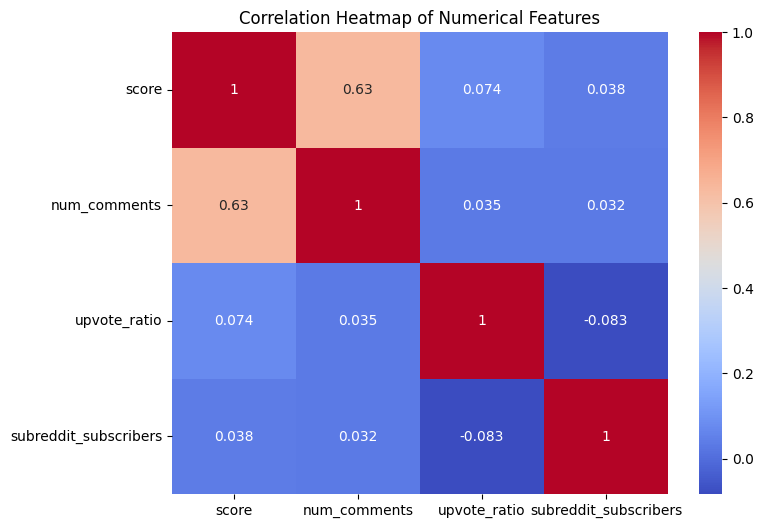

In [77]:
# Correlation between numbers
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['score', 'num_comments', 'upvote_ratio', 'subreddit_subscribers']].corr() , annot= True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Top 10 Subreddits by Average Upvote Ratio

This box plot displays the top 10 subreddits based on their average upvote ratio. The upvote ratio reflects the proportion of upvotes relative to total votes (upvotes + downvotes), indicating the overall positive reception of content in each subreddit.

#### Key Points:
- **X-Axis**: Represents the average upvote ratio for each subreddit.
- **Y-Axis**: Lists the top 10 subreddits ordered by their average upvote ratio, from highest to lowest.

#### Insights:
- **High Upvote Ratios Across Top Subreddits**: Subreddits such as "REDDITORSINRECOVERY," "OpiatesRecovery," and "drugscirclejerk" have the highest average upvote ratios, indicating that posts in these communities receive mostly positive feedback.
- **Positive Engagement**: The high upvote ratios across these subreddits suggest that the communities are generally supportive or appreciative of the content shared.
- **Consistency in Reception**: The narrow spread in upvote ratios for most subreddits indicates consistent positive feedback within these communities.

This analysis provides insight into the subreddits where posts tend to receive high approval from the community, reflecting positively engaged and supportive audiences.

C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\2570807090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = avg_upvote_subreddit.values, y=avg_upvote_subreddit.index, palette='Blues')


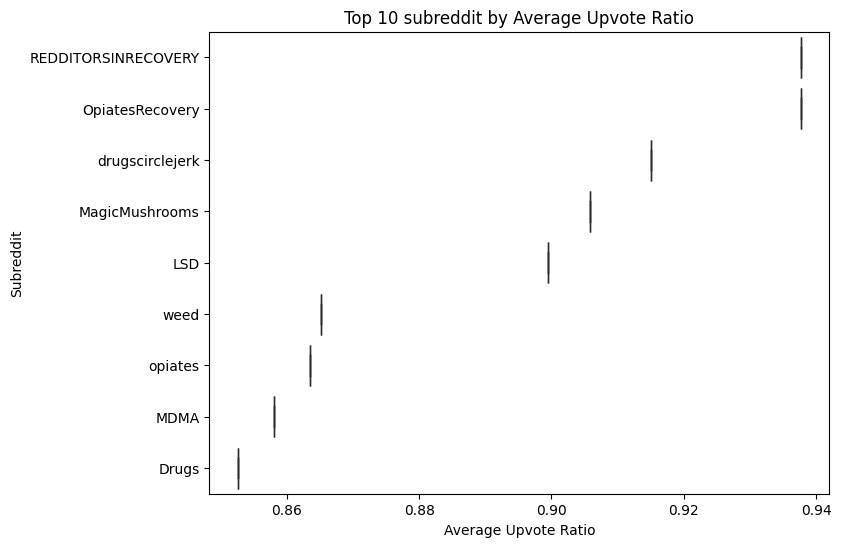

In [78]:
# Average Upvote Ratio by subreddit

avg_upvote_subreddit = df.groupby('subreddit')['upvote_ratio'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.boxplot(x = avg_upvote_subreddit.values, y=avg_upvote_subreddit.index, palette='Blues')
plt.xlabel('Average Upvote Ratio')
plt.ylabel('Subreddit')
plt.title('Top 10 subreddit by Average Upvote Ratio')
plt.show()

### Monthly Trend of Total Comments Across All Subreddits

This line plot shows the total number of comments across all subreddits for each month. By aggregating the total comments per month, we can observe trends in user engagement over time.

#### Key Points:
- **X-Axis**: Represents the timeline, with each data point indicating the start of a month.
- **Y-Axis**: Shows the total number of comments for each month across all subreddits.

#### Insights:
- **Increasing Engagement**: The graph shows a significant increase in the total number of comments from March to June, indicating a period of high engagement.
- **Peaks and Declines**: There is a sharp peak in June, followed by a steep decline in July. This suggests that specific events or seasonal factors might have influenced engagement levels.
- **Potential for Further Analysis**: This trend may warrant further investigation to determine if certain topics or external factors contributed to the surge in comments during this period.

This visualization provides an overview of how user interaction fluctuates over time, helping to identify periods of increased activity and potential factors driving engagement.

C:\Users\ayush\AppData\Local\Temp\ipykernel_26260\1922363435.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_comments = df.set_index('retrieved_utc').resample('M')[


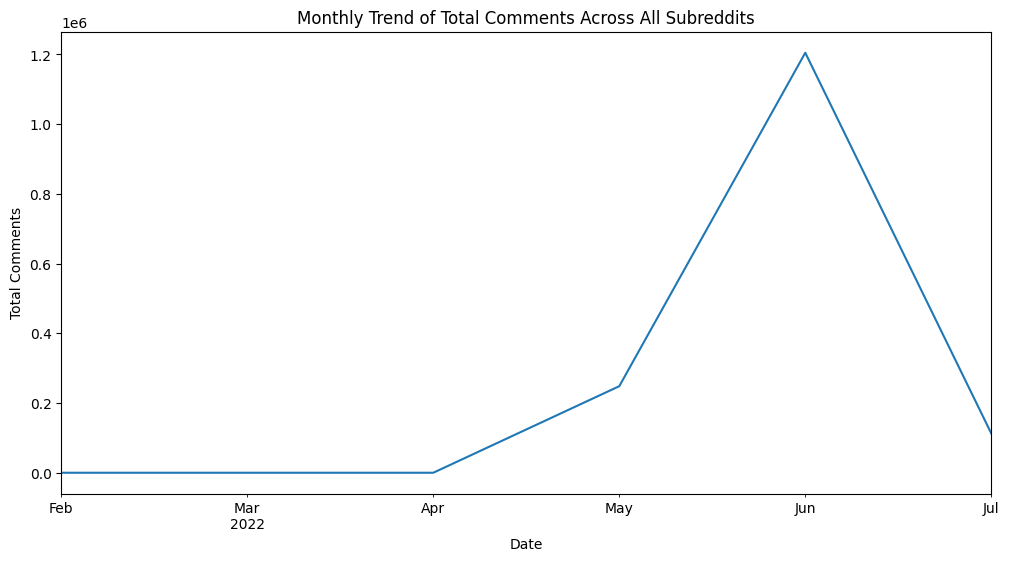

In [79]:
monthly_comments = df.set_index('retrieved_utc').resample('M')[
    'num_comments'].sum()
monthly_comments.plot(figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Total Comments")
plt.title("Monthly Trend of Total Comments Across All Subreddits")
plt.show()

In [90]:
# Adding word count feature for post content
df['word_count'] = df['selftext'].apply(lambda x: len(str(x).split()))

### Feature Engineering

A `word_count` feature is added to analyze the effect of post length on engagement.


In [92]:
df['word_count'].head(10)

368452     33
368453     38
368454     32
368455     21
368456    532
368457     92
368458     96
368459     65
368460    194
368461     57
Name: word_count, dtype: int64